In [2]:
import pandas as pd
import numpy as np
from bayesian_calibration import BayesianCalibration
import os
%matplotlib inline

 # Use default_rng() for reproducibility (with seed 1 as per your setup)
rg = np.random.default_rng(1)

### Investiagting effect of different datatypes on calibration 

In [3]:
# Import Data and Emulators
n_samples = 50
n_params = 9

# Data
input_file = pd.read_csv(f"../output/input_{n_samples}_{n_params}params.csv")
full_output = pd.read_csv(f"../output/output_{n_samples}_{n_params}params/waveform_resampled_all_pressure_traces_rv_with_pca.csv")

# emulators
emulators = pd.read_pickle(f"../output/output_{n_samples}_{n_params}params/emulators/linear_models_and_r2_scores_{n_samples}.pkl")
print(emulators)

# Direcotry for saving results
output_dir = f"../output/output_{n_samples}_{n_params}params/bayesian_calibration_results/"

# Make directory if it doesn't exist
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

      R2_Score       MSE       RSE               Model
0     0.805734  0.070816  0.297524  LinearRegression()
1     0.808417  0.048719  0.246776  LinearRegression()
2     0.813737  0.033799  0.205544  LinearRegression()
3     0.819723  0.024270  0.174175  LinearRegression()
4     0.823846  0.018538  0.152225  LinearRegression()
...        ...       ...       ...                 ...
PC6   0.495013  0.041969  0.229043  LinearRegression()
PC7   0.386792  0.034034  0.206258  LinearRegression()
PC8   0.053619  0.011747  0.121176  LinearRegression()
PC9   0.449847  0.001568  0.044275  LinearRegression()
PC10  0.162981  0.000982  0.035033  LinearRegression()

[146 rows x 4 columns]


In [7]:
input_file

,# pat.r,pat.c,rv.E_pas,rv.E_act,rv.k_pas,ra.E_pas,ra.E_act,ra.k_pas,T,sas.r,...,la.tpww,ra.tpww,lv.td,rv.td,sas.v,sat.v,svn.v,pas.v,pat.v,pvn.v
0,0.418681,5.439191,0.578021,1.623082,0.012798,0.530351,0.230634,0.017784,0.504594,0.003,...,0.045413,0.045413,0.227067,0.227067,0.910988,18.219767,233.440764,2.049724,61.937993,233.440764
1,0.245378,2.009408,0.748398,3.143902,0.020537,0.466798,0.347268,0.028431,0.744102,0.003,...,0.066969,0.066969,0.334846,0.334846,0.980624,19.612472,251.284796,2.206403,24.630910,251.284796
2,0.175394,4.310609,0.447199,1.027756,0.027854,0.287654,0.137255,0.021250,0.823215,0.003,...,0.074089,0.074089,0.370447,0.370447,0.932784,18.655685,239.025959,2.098765,50.260849,239.025959
3,0.314588,3.018325,0.952510,2.211753,0.015134,0.726176,0.253165,0.011896,0.653520,0.003,...,0.058817,0.058817,0.294084,0.294084,0.959059,19.181171,245.758754,2.157882,36.184380,245.758754
4,0.375355,4.150716,0.802146,2.517839,0.018272,0.610910,0.174653,0.022824,0.895458,0.003,...,0.080591,0.080591,0.402956,0.402956,0.935957,18.719136,239.838932,2.105903,48.561140,239.838932
5,0.202099,3.778688,0.636822,0.811634,0.026003,0.422387,0.309971,0.013470,0.576948,0.003,...,0.051925,0.051925,0.259627,0.259627,0.943423,18.868455,241.752083,2.122701,44.561255,241.752083
6,0.305842,5.160555,0.849197,3.023102,0.023652,0.320347,0.205565,0.016837,0.428082,0.003,...,0.038527,0.038527,0.192637,0.192637,0.916274,18.325486,234.795289,2.061617,59.106045,234.795289
7,0.445084,2.651026,0.348979,1.653896,0.010902,0.633899,0.341609,0.027484,0.816268,0.003,...,0.073464,0.073464,0.367320,0.367320,0.966799,19.335974,247.742165,2.175297,32.037601,247.742165
8,0.462979,4.639970,0.895324,0.670876,0.022257,0.690710,0.169688,0.024368,0.945691,0.003,...,0.085112,0.085112,0.425561,0.425561,0.926316,18.526328,237.368571,2.084212,53.726002,237.368571
9,0.287341,3.111998,0.395762,2.567186,0.014518,0.252310,0.283644,0.014970,0.566047,0.003,...,0.050944,0.050944,0.254721,0.254721,0.957104,19.142087,245.257992,2.153485,37.231340,245.257992


### Summary Stats of Waveform


In [18]:
emulators['Model'][0]

/var/folders/rc/594kgpld1czfpr55m3_m1szw0000gr/T/ipykernel_86384/1500047012.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  emulators['Model'][0]


LinearRegression()

/Users/lbokeria/projects/health_gc/cvd_net_project/cvd-net-pipeline/venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


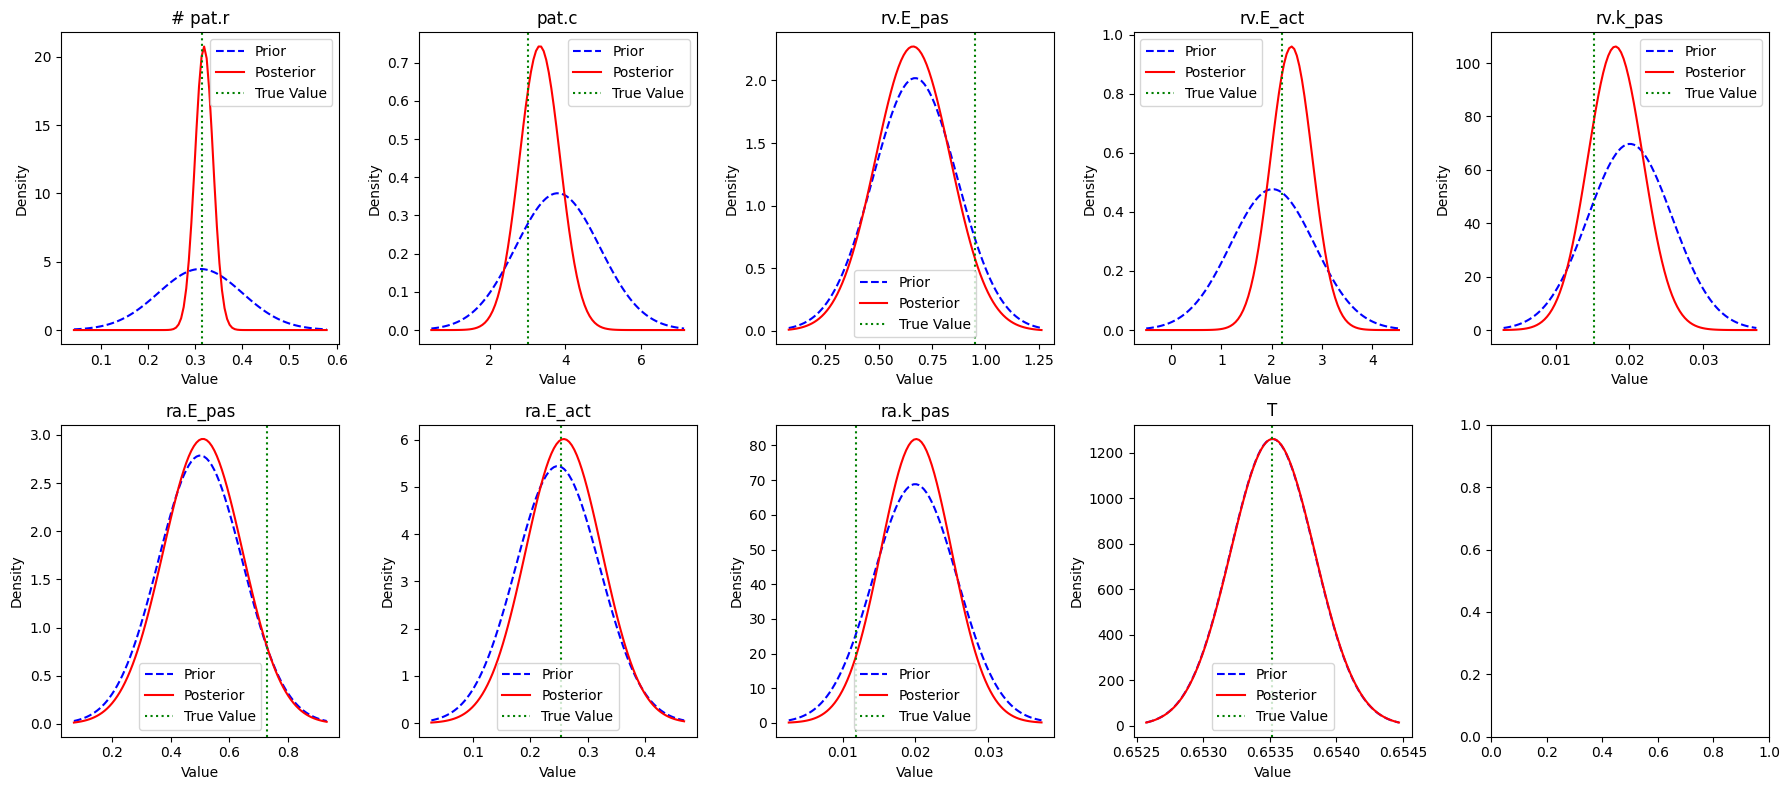

In [19]:
output_keys = ['t_max_dpdt', 'a_epad', 'epad', 's_a_epad', 's_epad', 'min_dpdt', 'max_dpdt',
                         'A_p', 'P_max', 'esp', 'sys', 'EF',  'Ees/Ea', 'iT', 'PC1', 'PC2', 'PC3']
emulator_output = emulators.loc[output_keys]
filtered_output = full_output.loc[:, output_keys]

bc_summary = BayesianCalibration(input_file, emulator_output, filtered_output, which_obs=3, epsilon_obs_scale=0.05)

bc_summary.compute_posterior()
bc_summary.plot_distributions()

bc_summary.sample_posterior(n_samples=100)
bc_summary.samples_df.to_csv(f"{output_dir}/posterior_samples_summarystats.csv", index=False)


### Waveform Only

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


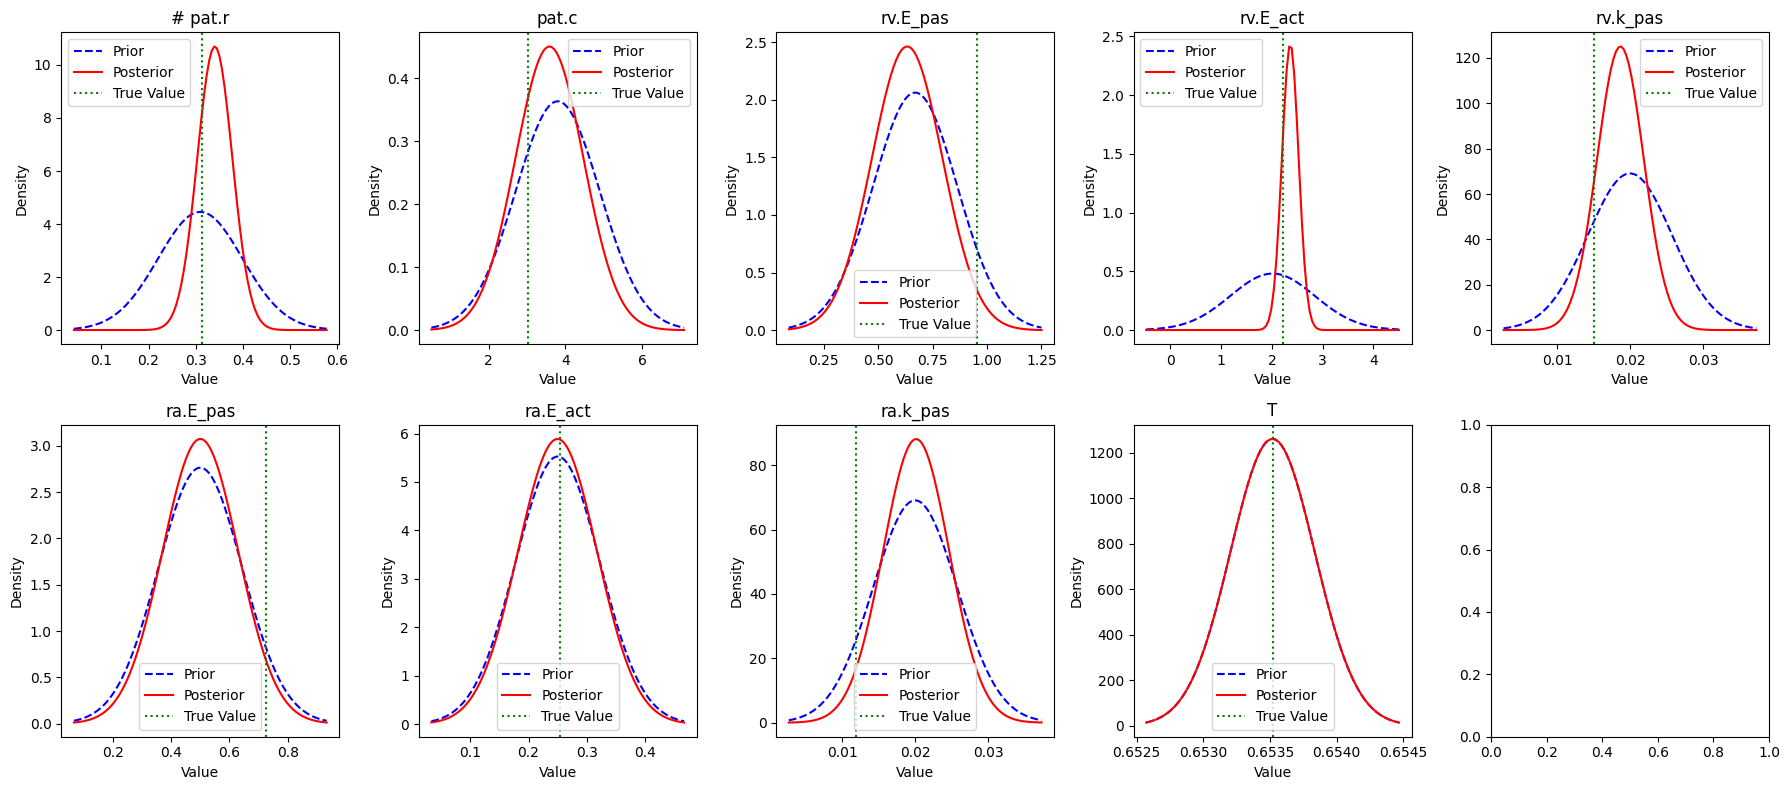

In [6]:
output_keys = full_output.iloc[:,:101].columns
emulator_output= emulators.loc[output_keys]
filtered_output = full_output.loc[:, output_keys]


#obs_error = np.max(np.std(filtered_output)) # Error is equal to max std of the filtered output
obs_error = 1
size = filtered_output.shape[1]  # Ensure the matrix matches the size of filtered_output
e_obs = np.diag(np.full(size, obs_error))  # Create a diagonal matrix


bc_wave = BayesianCalibration(input_file, emulator_output, filtered_output, which_obs=3, epsilon_obs_scale=0.05, epsilon_alt=e_obs)
bc_wave.compute_posterior()

bc_wave.plot_distributions()


bc_wave.sample_posterior(n_samples=100)
bc_wave.samples_df.to_csv(f"{output_dir}/posterior_samples_waveform.csv", index=False)


### Waveform plus summaries

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


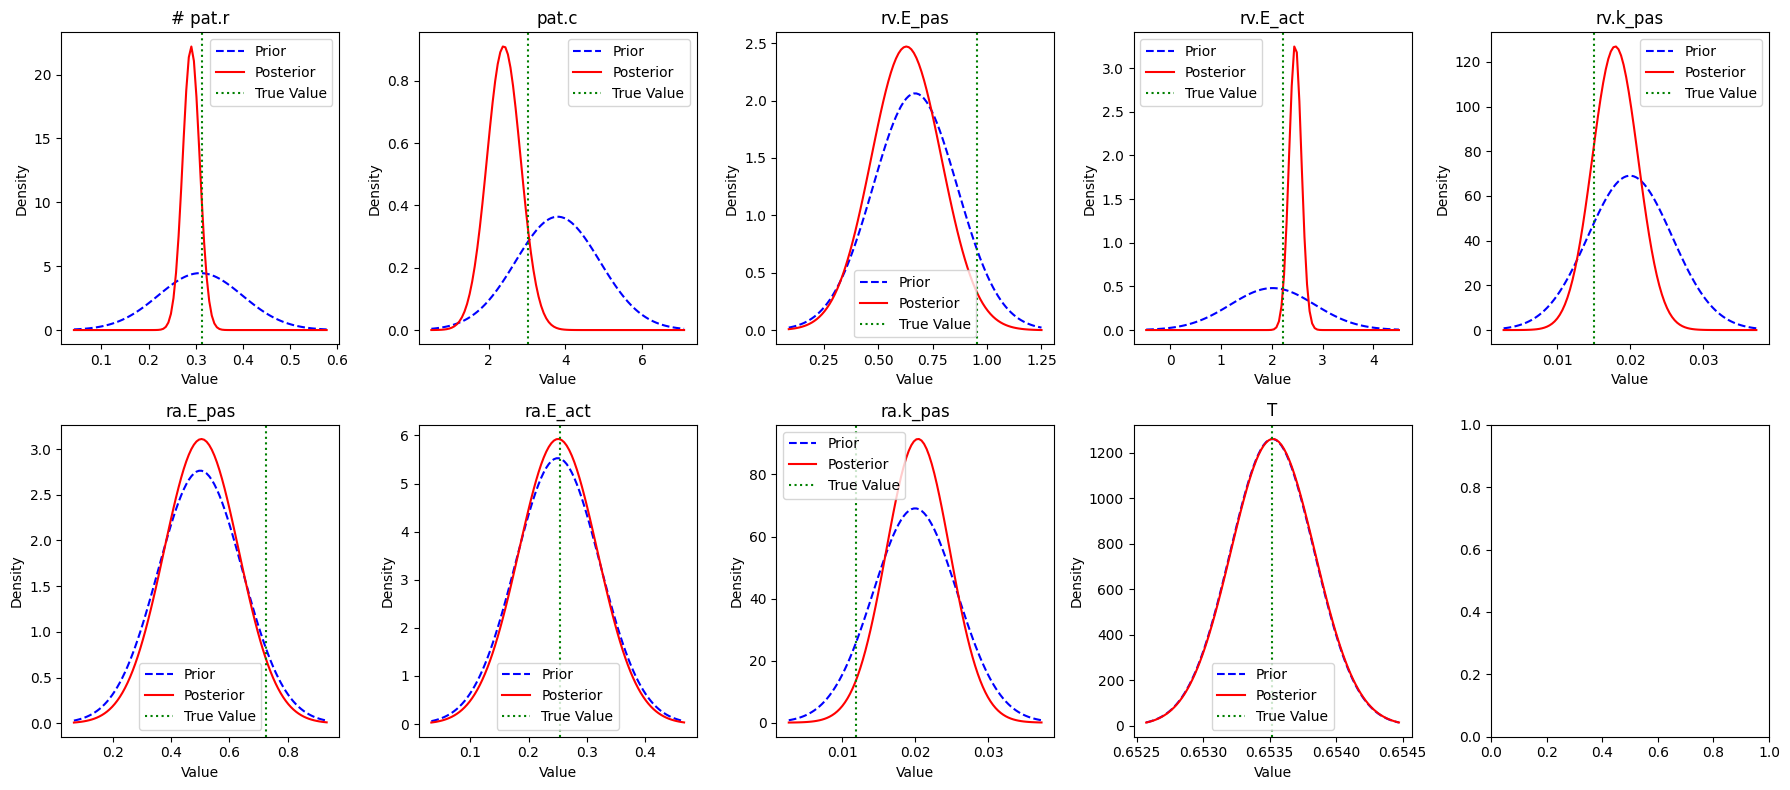

In [7]:
output_keys_df = full_output.iloc[:, :101].columns.tolist()
additional_keys = ['t_max_dpdt', 'a_epad', 'epad', 's_a_epad', 's_epad', 'min_dpdt', 'max_dpdt',
                   'A_p', 'P_max', 'esp', 'sys', 'EF', 'Ees/Ea', 'iT', 'PC1', 'PC2', 'PC3']

# Concatenate 
output_keys = list(dict.fromkeys(output_keys_df + additional_keys))
emulator_output = emulators.loc[output_keys]
filtered_output = full_output.loc[:, output_keys]

sd_values = full_output[additional_keys].std().values

# Build the diagonal entries: 101 ones followed by the std devs
diagonal_values = np.concatenate([np.ones(101), sd_values])  # shape: (118,)

# Create the diagonal matrix
e_obs = np.diag(diagonal_values)



bc_plus = BayesianCalibration(input_file, emulator_output, filtered_output, which_obs=3, epsilon_obs_scale=0.05, epsilon_alt=e_obs)
bc_plus.compute_posterior()
bc_plus.plot_distributions()


bc_plus.sample_posterior(n_samples=100)
bc_plus.samples_df.to_csv(f"{output_dir}/posterior_samples_waveplus.csv", index=False)


### PCA data only

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


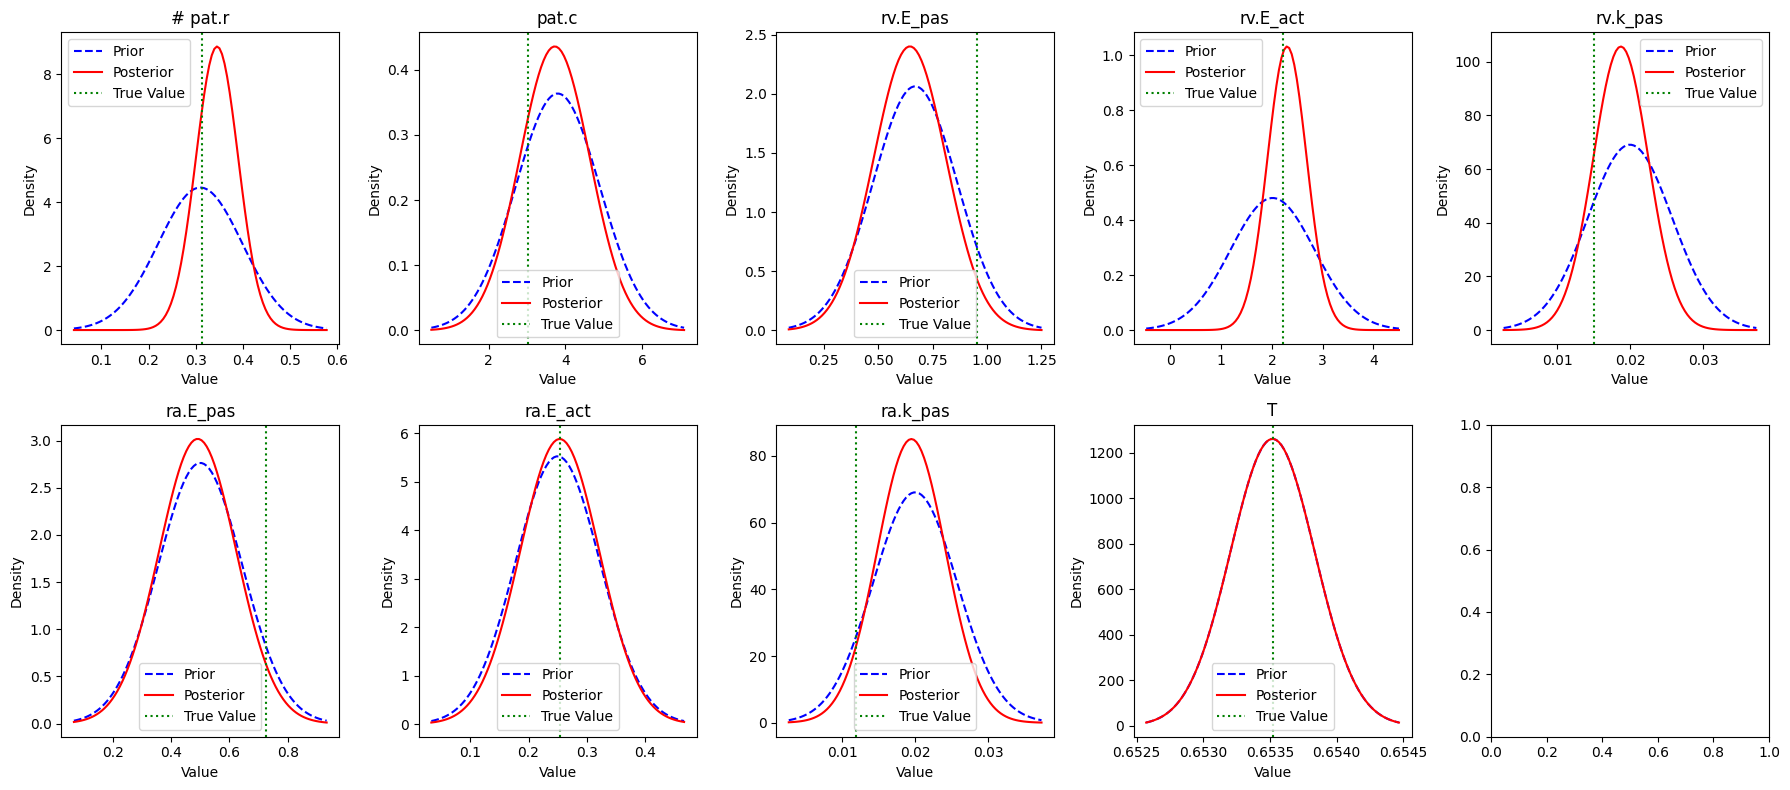

In [8]:
output_keys = ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
emulator_output = emulators.loc[output_keys]
filtered_output = full_output.loc[:, output_keys]

obs_error = 1
size = filtered_output.shape[1]  # Ensure the matrix matches the size of filtered_output
e_obs = np.diag(np.full(size, obs_error))  # Create a diagonal matrix

bc_pca = BayesianCalibration(input_file, emulator_output, filtered_output, which_obs=3, epsilon_obs_scale=0.05, epsilon_alt=e_obs)

bc_pca.compute_posterior()
bc_pca.plot_distributions()


bc_pca.sample_posterior(n_samples=100)
bc_pca.samples_df.to_csv(f"{output_dir}/posterior_samples_pca.csv", index=False)

### PCA 1,2,3

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


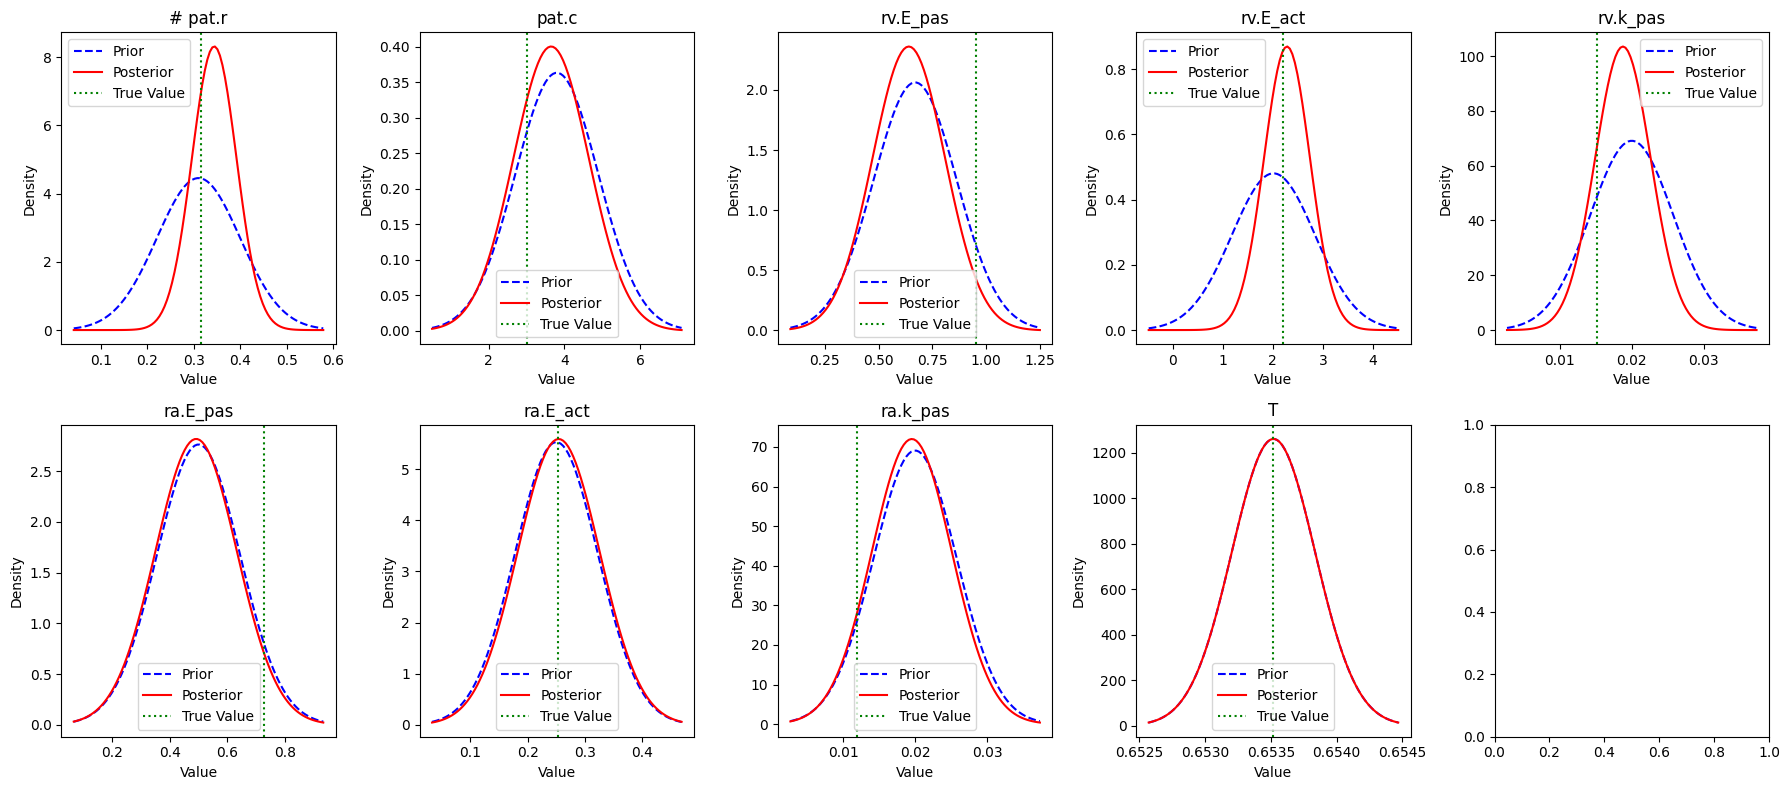

In [9]:
output_keys = ['PC1', 'PC2', 'PC3']
emulator_output = emulators.loc[output_keys]
filtered_output = full_output.loc[:, output_keys]

obs_error = 1
size = filtered_output.shape[1]  # Ensure the matrix matches the size of filtered_output
e_obs = np.diag(np.full(size, obs_error))  # Create a diagonal matrix

bc_pca1 = BayesianCalibration(input_file, emulator_output, filtered_output, which_obs=3, epsilon_obs_scale=0.05, epsilon_alt=e_obs)

bc_pca1.compute_posterior()
bc_pca1.plot_distributions()


bc_pca1.sample_posterior(n_samples=100)
bc_pca1.samples_df.to_csv(f"{output_dir}/posterior_samples_pca_123.csv", index=False)

### Outputs where enmulator error is lowest

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


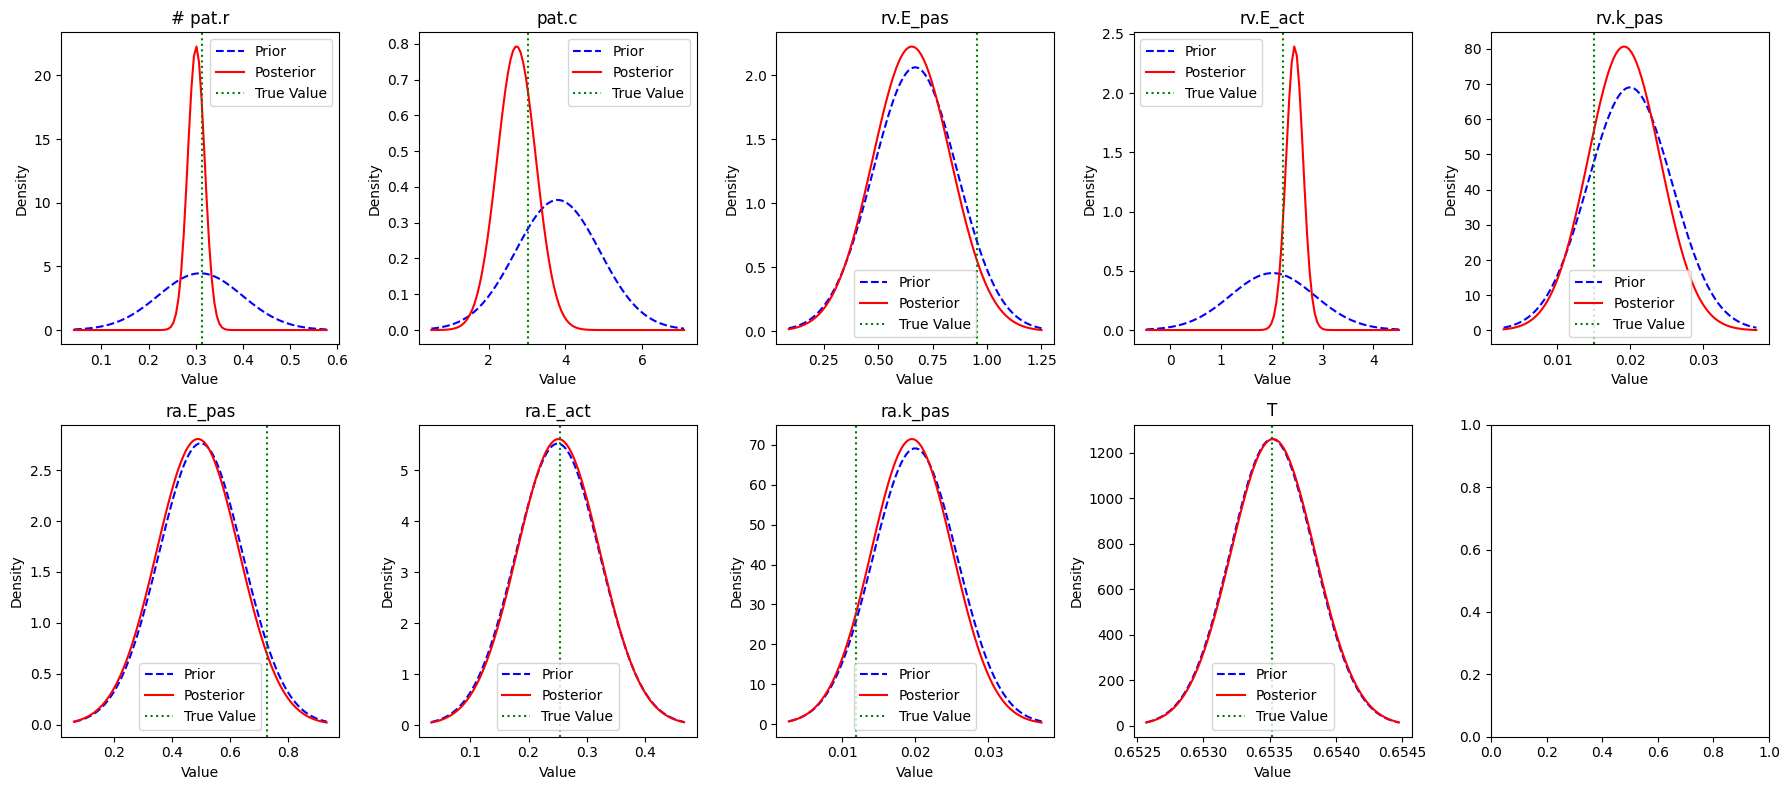

In [10]:
best_emulators = emulators.iloc[101:,:]['R2_Score'] > 0.9
output_keys = best_emulators[best_emulators].index

emulator_output = emulators.loc[output_keys]
filtered_output = full_output.loc[:, output_keys]

bc_best = BayesianCalibration(input_file, emulator_output, filtered_output, epsilon_obs_scale=0.05, which_obs=3)

bc_best.compute_posterior()
bc_best.plot_distributions()


bc_best.sample_posterior(n_samples=100)
bc_best.samples_df.to_csv(f"{output_dir}/posterior_samples_bestem.csv", index=False)

In [11]:
best_emulators


a_epad_ind    False
epad_ind      False
dia_ind       False
sys_ind       False
esp_ind       False
t_max_dpdt     True
a_epad         True
epad           True
s_a_epad       True
s_epad        False
min_dpdt       True
max_dpdt       True
a_alpha        True
b_alpha        True
a_beta         True
b_beta         True
cross_ind      True
cross_max      True
A_p            True
P_max          True
esp            True
sys            True
EF             True
dia           False
tau            True
Ees/Ea         True
iT             True
iHR            True
CO             True
PC1           False
PC2            True
PC3           False
PC4           False
PC5           False
PC6           False
PC7           False
PC8           False
PC9           False
PC10          False
Name: R2_Score, dtype: bool

## Reconstruct pressure waveform

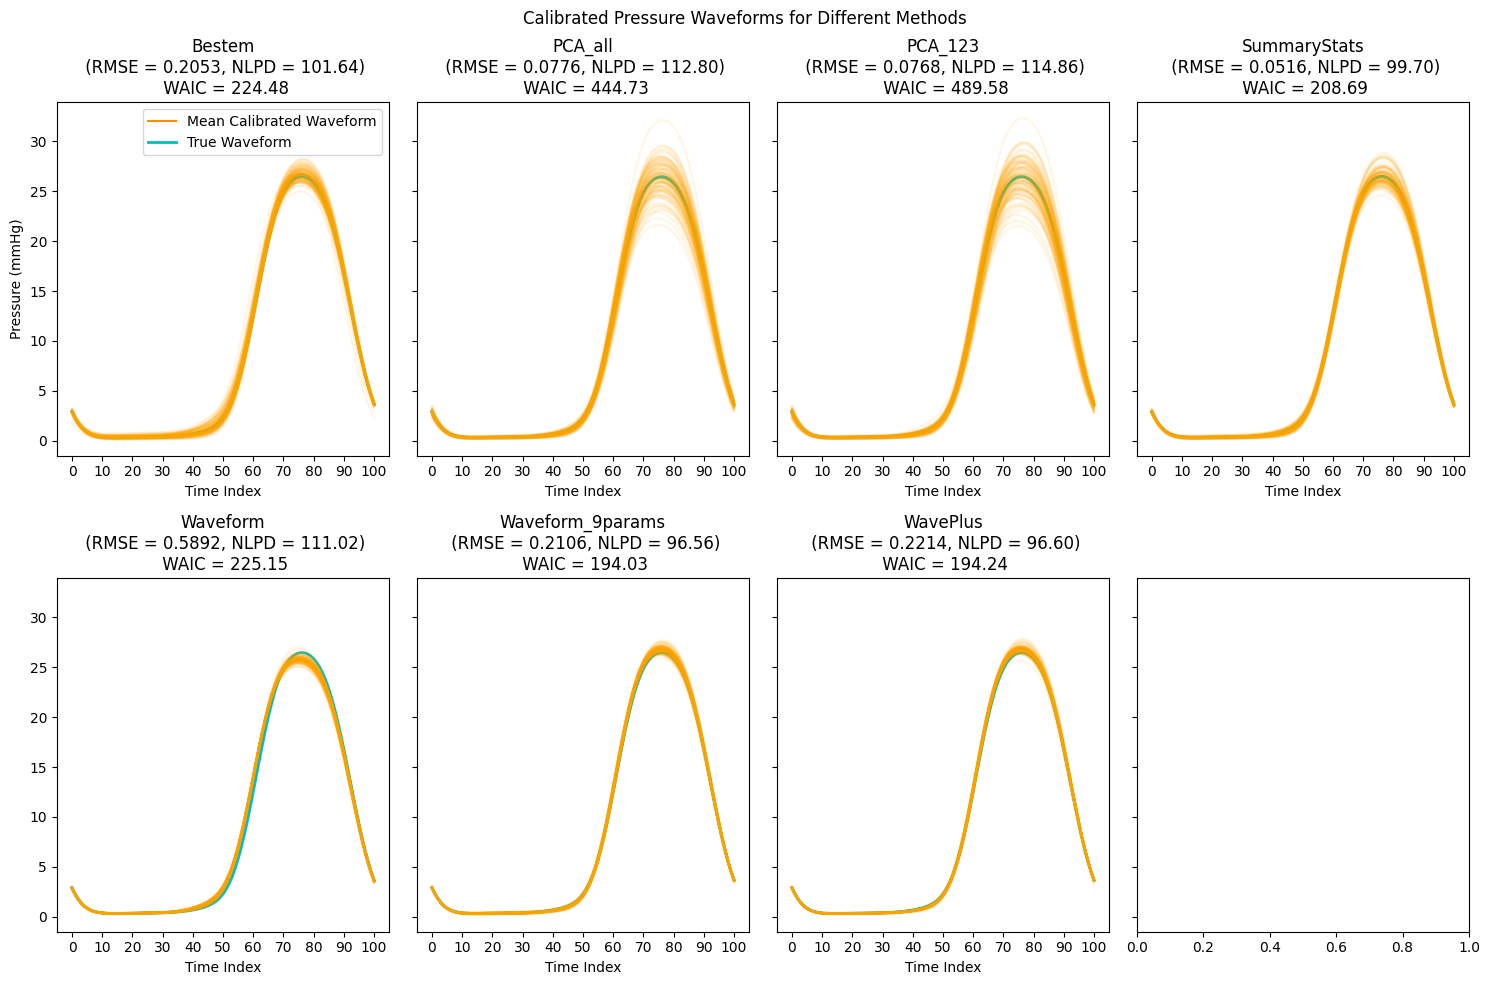

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
# Load DataFrames

summarystats = pd.read_csv(f"../Results/{n_samples}_{n_params}params/Posterior_Simulations/Resampled_Posterior/summarystats_resampled_all_pressure_traces_rv.csv")
bestem = pd.read_csv(f"../Results/{n_samples}_{n_params}params/Posterior_Simulations/Resampled_Posterior/bestem_resampled_all_pressure_traces_rv.csv")
PCA_all = pd.read_csv(f"../Results/{n_samples}_{n_params}params/Posterior_Simulations/Resampled_Posterior/pca_resampled_all_pressure_traces_rv.csv")
PCA_123 = pd.read_csv(f"../Results/{n_samples}_{n_params}params/Posterior_Simulations/Resampled_Posterior/pca_123_resampled_all_pressure_traces_rv.csv")
waveform= pd.read_csv(f"../Results/{n_samples}_6params/Posterior_Simulations/Resampled_Posterior/waveform_resampled_all_pressure_traces_rv.csv")
waveplus = pd.read_csv(f"../Results/{n_samples}_{n_params}params/Posterior_Simulations/Resampled_Posterior/waveplus_resampled_all_pressure_traces_rv.csv")

waveform_9params = pd.read_csv(f"../Results/{n_samples}_{n_params}params/Posterior_Simulations/Resampled_Posterior/waveform_resampled_all_pressure_traces_rv.csv")

datasets = {"Bestem": bestem, "PCA_all": PCA_all, "PCA_123": PCA_123, "SummaryStats": summarystats, "Waveform": waveform, "Waveform_9params": waveform_9params, "WavePlus": waveplus}


# Ground truth waveform
which_obs = 3
y_true = pd.Series(full_output.iloc[which_obs, :101].values)


fig, axes = plt.subplots(2, 4, figsize=(15, 10), sharey=True)
axes = axes.flatten()

for i, (name, df) in enumerate(datasets.items()):
    ax = axes[i]  # Assign the correct axis
    
    samples = df.iloc[:, :101].values # Shape (100,101)
    

    # Compute and plot the mean waveform
    mean_waveform = samples.mean(axis=0)
    var_waveform = samples.var(axis=0) + 1e-6  # Adding a small constant to avoid division by zero
    
    
    ax.plot(mean_waveform, color='darkorange', linewidth=1.5, label="Mean Calibrated Waveform")

      
    

    # Inputs
    y_obs = y_true.values                    # shape: (101,)
    posterior_preds = samples               # shape: (100, 101)
    S, T = posterior_preds.shape            # S = 100, T = 101

    # Set Gaussian likelihood standard deviation (fixed)
    sigma = 1.0  # Adjust if your model has a known or estimated σ

    # Compute log pointwise predictive density
    log_likelihoods = -0.5 * np.log(2 * np.pi * sigma**2) \
                    - ((y_obs - posterior_preds)**2) / (2 * sigma**2)
     

    
    # log_likelihoods shape: (100, 101)
    # Average over posterior samples (axis 0), then sum over timepoints
    lppd =  np.sum(np.log(np.mean(np.exp(log_likelihoods), axis=0)))
    nlpd = -lppd

    # p_WAIC: sum of variances of log-likelihoods across posterior samples
    p_waic = np.sum(np.var(log_likelihoods, axis=0, ddof=1))  # scalar

    # WAIC computation
    waic = -2 * (lppd - p_waic)

    # Compute RMSE
    sqe = (y_obs - mean_waveform) ** 2
    rmse = np.sqrt(sqe.mean(axis=0))
       
    # Plot y_true
    ax.plot(y_true.values, label="True Waveform", color='c', linewidth=2)
    
    # Plot all waveforms in faded orange
    for j in range(100):
        ax.plot(df.iloc[j, :101].values, color='orange', alpha=0.1)
    
      
    ax.set_xticks(np.arange(0, 110, 10))
    ax.set_xlabel("Time Index")
    ax.set_title(f"{name}\n (RMSE = {rmse:.4f}, NLPD = {nlpd:.2f})\n WAIC = {waic:.2f}")
axes[0].set_ylabel("Pressure (mmHg)")
axes[0].legend()

plt.suptitle("Calibrated Pressure Waveforms for Different Methods")
plt.tight_layout()
plt.show()
